In [1]:
from tensorflow.keras.datasets import cifar10, cifar100, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Reshape
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
# Model configuration
batch_size = 500
img_width, img_height, img_num_channels = 64, 64, 3
loss_function = sparse_categorical_crossentropy
no_classes = 4
no_epochs = 10
optimizer = Adam()
validation_split = 0.2

verbosity = 2
test_size=1500
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)


#https://www.kaggle.com/jerzydziewierz/bee-vs-wasp



2.10.0


In [2]:

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.10.0


In [3]:

import numpy as np
import matplotlib.pyplot as plt

In [16]:

img_width = 64
img_height = 64
datagen = ImageDataGenerator(rescale=1/255.0 )

train_data_generator = datagen.flow_from_directory(directory='I:E/datasets/kaggle_bee_vs_wasp',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size =1501,
                                                   subset = 'training',
                                                   shuffle=True
                                                   )

Found 11421 images belonging to 4 classes.


In [10]:
# img_width = 128
# img_height = 128
# datagen = ImageDataGenerator(rescale=1/255.0 )

# validation_data_generator = datagen.flow_from_directory(directory='G:/datasets/birds/valid',
#                                                    target_size = (img_width, img_height),
#                                                    class_mode = 'binary',
#                                                    batch_size = 1500,
#                                                    subset = 'training',
#                                                    shuffle=True
#                                                    )

In [11]:
# img_width = 128
# img_height = 128
# datagen = ImageDataGenerator(rescale=1/255.0 )

# test_data_generator = datagen.flow_from_directory(directory='G:/datasets/birds/test',
#                                                    target_size = (img_width, img_height),
#                                                    class_mode = 'binary',
#                                                    batch_size = 1500,
#                                                    subset = 'training',
#                                                    shuffle=True
#                                                    )

In [17]:
input_train, target_train =train_data_generator[0]
# input_val, target_val =validation_data_generator[0]
# input_test, target_test =test_data_generator[0]


In [18]:
target_train.shape


(1501,)

In [19]:
input_test=input_train[-1500:]
target_test=target_train[-1500:]
input_train=input_train[:-1500]
target_train=target_train[:-1500]


In [20]:
input_test.shape

(1500, 64, 64, 3)

In [21]:
input_train.shape

(1, 64, 64, 3)

In [17]:
import numpy as np
def accuracy_from_test(pred, target_test):
    m=0
    for i in range(test_size):
        if np.argmax(pred[i], axis=-1)==int(target_test[i]):
            m+=1
    print(m/test_size)


def define_space(pred1, pred2, target_test):
    m=0
    pred1_list=list()
    pred2_list=list()
    compare_list=list() 
    same_pred_id=list()
    dif_pred_id=list()
    
    for i in range(test_size):
        if np.argmax(pred1[i], axis=-1)==int(target_test[i]):
            pred1_list.append(1)
        else:
            pred1_list.append(0)
            
        if np.argmax(pred2[i], axis=-1)==int(target_test[i]):
            pred2_list.append(1)
        else:
            pred2_list.append(0)
        if np.argmax(pred1[i], axis=-1)==np.argmax(pred2[i], axis=-1):
            if np.argmax(pred1[i], axis=-1)==int(target_test[i]):
                same_pred_id.append(i)
            else:
                dif_pred_id.append(i)
    #return pred1_list, pred2_list

    print(len(pred1_list), len(pred2_list))   
    n=0
    for i in pred1_list :
        if i==1 and pred2_list[n]==0:
            m+=1
            n+=1
        else:
            n+=1
    print("pred1 unique adnvantage", m/test_size)

In [18]:
from tensorflow.keras.metrics import TrueNegatives, TruePositives, Recall, Precision, Accuracy

In [10]:
tf.random.set_seed(25)

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_width, img_height,3)))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

>0.412
>0.645
>0.714
>0.738
>0.744
>0.769
>0.798
>0.838
>0.916
>0.907
Estimated Accuracy 0.748 (0.138)
47/47 [==============================] - 0s 2ms/step
> 1: single=0.734, ensemble=0.734
47/47 [==============================] - 0s 1ms/step
> 2: single=0.734, ensemble=0.734
47/47 [==============================] - 0s 1ms/step
> 3: single=0.734, ensemble=0.734
47/47 [==============================] - 0s 2ms/step
> 4: single=0.734, ensemble=0.734
47/47 [==============================] - 0s 2ms/step
> 5: single=0.734, ensemble=0.734
47/47 [==============================] - 0s 2ms/step
> 6: single=0.734, ensemble=0.734
47/47 [==============================] - 0s 2ms/step
> 7: single=0.734, ensemble=0.734
47/47 [==============================] - 0s 2ms/step
> 8: single=0.734, ensemble=0.734
47/47 [==============================] - 0s 2ms/step
> 9: single=0.734, ensemble=0.734
47/47 [==============================] - 0s 2ms/step
> 10: single=0.734, ensemble=0.734
Accuracy 0.734 (0.000)


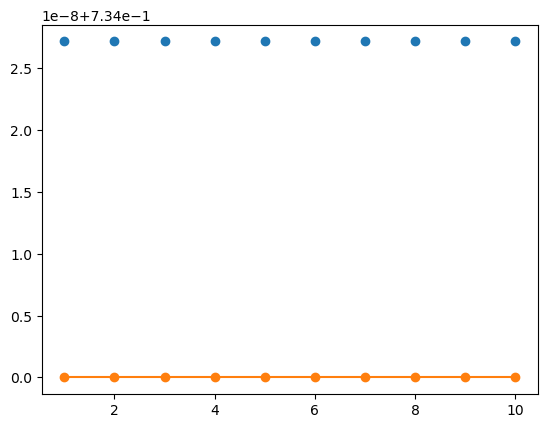

In [11]:
#############   random split

##############random split
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from numpy import mean
from numpy import std
import numpy
from numpy import array
from numpy import argmax
 
# evaluate a single mlp model
def evaluate_model(trainX, trainy, testX, testy):
	# encode targets
	trainy_enc = to_categorical(trainy)
	testy_enc = to_categorical(testy)
	# define model
	
    
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy_enc, epochs=1, verbose=0, batch_size=32)
	# evaluate the model
	_, test_acc = model.evaluate(testX, testy_enc, verbose=0, batch_size=32)
	return model, test_acc
 
# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
	# make predictions
	yhats = [model.predict(testX) for model in members]
	yhats = array(yhats)
	# sum across ensemble members
	summed = numpy.sum(yhats, axis=0)
	# argmax across classes
	result = argmax(summed, axis=1)
	return result
 
# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
	# select a subset of members
	subset = members[:n_members]
	# make prediction
	yhat = ensemble_predictions(subset, testX)
	# calculate accuracy
	return accuracy_score(testy, yhat)
 

X, y  = input_train, target_train
newX, newy = input_test, target_test  
# multiple train-test splits
n_splits = 10
scores, members = list(), list()
for _ in range(n_splits):
	# split data
	trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.10)
	# evaluate model
	model, test_acc = evaluate_model(trainX, trainy, testX, testy)
	print('>%.3f' % test_acc)
	scores.append(test_acc)
	members.append(model)
# summarize expected performance
print('Estimated Accuracy %.3f (%.3f)' % (mean(scores), std(scores)))
# evaluate different numbers of ensembles on hold out set
single_scores, ensemble_scores = list(), list()
for i in range(1, n_splits+1):
	ensemble_score = evaluate_n_members(members, i, newX, newy)
	newy_enc = to_categorical(newy)
	_, single_score = members[i-1].evaluate(newX, newy_enc, verbose=0)
	print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
	ensemble_scores.append(ensemble_score)
	single_scores.append(single_score)
# plot score vs number of ensemble members
print('Accuracy %.3f (%.3f)' % (mean(single_scores), std(single_scores)))
x_axis = [i for i in range(1, n_splits+1)]
pyplot.plot(x_axis, single_scores, marker='o', linestyle='None')
pyplot.plot(x_axis, ensemble_scores, marker='o')
pyplot.show()

In [13]:
########## Precision ##################### random split
pred=model.predict(input_test)
m=tf.keras.metrics.Precision()
# x=a+c+b+ghhh
pred=np.argmax(pred, axis=1)
# x.shape
m.update_state(pred, target_test)
print("precision", m.result().numpy())

n=tf.keras.metrics.Recall()
n.update_state(pred, target_test)
print("recall", n.result().numpy())


print("f1",2*(n.result().numpy()*m.result().numpy())/(n.result().numpy()+n.result().numpy()) )

47/47 [==============================] - 0s 4ms/step
precision 0.92752296
recall 0.89310956
f1 0.9275229693326674


In [1]:
# model.summary()

In [16]:
tf.random.set_seed(25)

model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [17]:
tf.random.set_seed(25)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/main_model",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history= model.fit(input_train, target_train,
            batch_size=16,
            epochs=75,
            verbose=verbosity,
            validation_split=validation_split,
                   callbacks=[model_checkpoint_callback]
            )

Train on 7936 samples, validate on 1985 samples
Epoch 1/75
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/main_model\assets
7936/7936 - 5s - loss: 0.9698 - accuracy: 0.6293 - val_loss: 1.0973 - val_accuracy: 0.6005
Epoch 2/75
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/main_model\assets
7936/7936 - 4s - loss: 0.7114 - accuracy: 0.7070 - val_loss: 0.7711 - val_accuracy: 0.7013
Epoch 3/75
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/main_model\assets
7936/7936 - 3s - loss: 0.6030 - accuracy: 0.7605 - val_loss: 0.7380 - val_accuracy: 0.7159
Epoch 4/75
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/main_model\assets
7936/7936 - 4s - loss: 0.5392 - accuracy: 0.7927 - val_loss: 0.5987 - val_accuracy: 0.7773
Epoch 5/75
7936/7936 - 2s - loss: 0.4503 - accuracy: 0.8277 - v

Epoch 70/75
7936/7936 - 2s - loss: 0.0153 - accuracy: 0.9955 - val_loss: 1.8943 - val_accuracy: 0.7743
Epoch 71/75
7936/7936 - 2s - loss: 0.0464 - accuracy: 0.9885 - val_loss: 1.8146 - val_accuracy: 0.7295
Epoch 72/75
7936/7936 - 2s - loss: 0.0227 - accuracy: 0.9929 - val_loss: 1.5796 - val_accuracy: 0.7929
Epoch 73/75
7936/7936 - 2s - loss: 0.0101 - accuracy: 0.9971 - val_loss: 1.6486 - val_accuracy: 0.7824
Epoch 74/75
7936/7936 - 2s - loss: 0.0158 - accuracy: 0.9963 - val_loss: 2.0147 - val_accuracy: 0.7577
Epoch 75/75
7936/7936 - 2s - loss: 0.0492 - accuracy: 0.9884 - val_loss: 1.6185 - val_accuracy: 0.7819


In [18]:
history.history['accuracy']

[0.62928426,
 0.70703125,
 0.76045865,
 0.79271674,
 0.827747,
 0.85420865,
 0.88067037,
 0.9125504,
 0.9314516,
 0.9485887,
 0.9561492,
 0.9610635,
 0.9671119,
 0.9701361,
 0.9785786,
 0.9779486,
 0.9747984,
 0.9735383,
 0.9823589,
 0.9734123,
 0.984753,
 0.98210686,
 0.9863911,
 0.98651713,
 0.9832409,
 0.9862651,
 0.98676914,
 0.984501,
 0.984123,
 0.9860131,
 0.9901714,
 0.9875252,
 0.98991936,
 0.9918095,
 0.98185486,
 0.9909274,
 0.9853831,
 0.9923135,
 0.98714715,
 0.9905494,
 0.98840725,
 0.99004537,
 0.9930695,
 0.9919355,
 0.9901714,
 0.9904234,
 0.9918095,
 0.9905494,
 0.9942036,
 0.9916835,
 0.98853326,
 0.98991936,
 0.9953377,
 0.99760586,
 0.9924395,
 0.983619,
 0.99432963,
 0.9916835,
 0.9953377,
 0.9936996,
 0.9933216,
 0.99710184,
 0.9942036,
 0.9908014,
 0.9929435,
 0.9916835,
 0.9934476,
 0.99432963,
 0.9952117,
 0.9954637,
 0.98853326,
 0.9929435,
 0.99710184,
 0.99634576,
 0.98840725]

In [19]:
history.history["val_accuracy"]

[0.6005038,
 0.70125943,
 0.715869,
 0.77733,
 0.7551637,
 0.6095718,
 0.7536524,
 0.75969774,
 0.7622166,
 0.7440806,
 0.78488666,
 0.75919396,
 0.7345088,
 0.77581865,
 0.76675063,
 0.7697733,
 0.7541562,
 0.77733,
 0.7581864,
 0.772796,
 0.7697733,
 0.7813602,
 0.7632242,
 0.77783376,
 0.75667506,
 0.74760705,
 0.74962217,
 0.7622166,
 0.75969774,
 0.79445845,
 0.75919396,
 0.78287154,
 0.7904282,
 0.7858942,
 0.79193956,
 0.76171285,
 0.73853904,
 0.75264484,
 0.7581864,
 0.7702771,
 0.7677582,
 0.77128464,
 0.7869018,
 0.73148614,
 0.76372796,
 0.790932,
 0.76624686,
 0.7748111,
 0.7465995,
 0.75919396,
 0.77329975,
 0.7697733,
 0.8005038,
 0.75214106,
 0.66347605,
 0.7743073,
 0.7879093,
 0.77733,
 0.77581865,
 0.7879093,
 0.7743073,
 0.7607053,
 0.7506297,
 0.7692695,
 0.7435768,
 0.7697733,
 0.75667506,
 0.77078086,
 0.7798489,
 0.7743073,
 0.729471,
 0.7929471,
 0.78236777,
 0.7576826,
 0.781864]

In [20]:
history.history['val_loss']

[1.0973140553906748,
 0.7711418704662275,
 0.7380038798141577,
 0.5987353355912327,
 0.6227672581413118,
 1.1570020645631651,
 0.8205049056600268,
 0.7980535080961376,
 0.8947539241247874,
 1.1394662490435665,
 0.9819798761736385,
 1.1183622088729017,
 1.180322833986066,
 1.1839844500687997,
 1.1908440352086718,
 1.0632792105302402,
 1.2866745477509438,
 1.194119578404751,
 1.4610032195708613,
 1.3095859296069357,
 1.2420715945793939,
 1.2420384838088359,
 1.357329192599962,
 1.4581399921205842,
 1.6682206724392676,
 1.3687804288159175,
 1.6347013605545437,
 1.5403148980825314,
 1.4288900172380117,
 1.2113349226019545,
 1.687397775571953,
 1.347524509862328,
 1.456872178805565,
 1.5491782941055539,
 1.3699415390677656,
 1.4917238624419276,
 1.676849998154628,
 1.8286565447934628,
 1.3707135309200142,
 1.3993531549907752,
 1.7158247532111872,
 1.4675240615152891,
 1.4407194188845212,
 1.721269821640226,
 1.4243976688805395,
 1.4359997721102735,
 1.818418143753441,
 1.620950991590918,
 1

In [21]:
history.history['loss']

[0.9697781843884338,
 0.7113650631940653,
 0.6029535499251177,
 0.5392437613298816,
 0.4502984836862813,
 0.3750041937230215,
 0.3018219657242298,
 0.2388903931677041,
 0.18734758905690885,
 0.1442868786806714,
 0.12625467753499717,
 0.1085980730992648,
 0.0923945280674161,
 0.09024291171091693,
 0.06684840612207711,
 0.06333364226561718,
 0.0744683541919761,
 0.08069793772832665,
 0.053402133546716225,
 0.08235265540501895,
 0.050520938740925385,
 0.060825162807568924,
 0.039236252391146406,
 0.043072326023448224,
 0.04746266033071372,
 0.044111064228755575,
 0.04303928037153025,
 0.04898164643575529,
 0.04732888446078358,
 0.04497182670242102,
 0.03169956617994186,
 0.043443861769871306,
 0.03406300825194865,
 0.026419400902839132,
 0.05467860728916299,
 0.02826104496080121,
 0.04509251591729198,
 0.02350938156714546,
 0.036953482587500454,
 0.03052124813394592,
 0.03677139451874536,
 0.029793129050480777,
 0.022245247834122447,
 0.030069586767343396,
 0.028674133357581223,
 0.028893

In [14]:
model=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/bee_wasp/main_model/")

In [22]:
a=model.predict(input_test)
print(len(a))

47/47 [==============================] - 0s 2ms/step
1500


In [24]:
########## Precision ##################### Main model
m=tf.keras.metrics.Precision()
# x=a+c+b+ghhh
pred=np.argmax(a, axis=1)
# x.shape
# a=pred
m.update_state(pred, target_test)
print("precision", m.result().numpy())

n=tf.keras.metrics.Recall()
n.update_state(pred, target_test)
print("recall", n.result().numpy())


print("f1",2*(n.result().numpy()*m.result().numpy())/(n.result().numpy()+n.result().numpy()) )

precision 0.9665116
recall 0.98018867
f1 0.9665116169895756


In [23]:
accuracy_from_test(a, target_test)

NameError: name 'accuracy_from_test' is not defined

In [ ]:
##########################################################################################

In [25]:
tf.random.set_seed(25)

model1 = Sequential()
model1.add(Reshape((img_width, img_height,1), input_shape=(img_width, img_height)))
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(no_classes, activation='softmax'))

In [26]:
tf.random.set_seed(25)
model1.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [27]:
tf.random.set_seed(25)

model_checkpoint_callback1 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_1",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history1_1 = model1.fit(input_train[:,:,:,0], target_train,
            batch_size=16,
            epochs=25,
            verbose=verbosity,
            validation_split=validation_split,
                       callbacks=[model_checkpoint_callback1])



model1.save('model1_1.h5')




Train on 7936 samples, validate on 1985 samples
Epoch 1/25
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_1\assets
7936/7936 - 4s - loss: 1.1591 - accuracy: 0.5347 - val_loss: 1.2024 - val_accuracy: 0.5254
Epoch 2/25
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_1\assets
7936/7936 - 3s - loss: 0.8585 - accuracy: 0.6227 - val_loss: 0.9737 - val_accuracy: 0.5884
Epoch 3/25
7936/7936 - 2s - loss: 0.7812 - accuracy: 0.6590 - val_loss: 1.1062 - val_accuracy: 0.5657
Epoch 4/25
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_1\assets
7936/7936 - 3s - loss: 0.7036 - accuracy: 0.7006 - val_loss: 0.9668 - val_accuracy: 0.5995
Epoch 5/25
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_1\assets
7936/7936 - 3s - loss: 0.6433 - accuracy: 0.7317 - val_loss: 0.9887 - val_accuracy: 0.6332
Epoch 6/25
INFO:tensorflow:Assets written to: C:/U

In [28]:
history1_1.history["loss"]

[1.159134808326921,
 0.8584514021753303,
 0.7811662992762942,
 0.7036235369141063,
 0.6433440389171723,
 0.5558296892972242,
 0.45840908792771157,
 0.36089399231657865,
 0.2714862062806083,
 0.19669976158841182,
 0.14820279856400204,
 0.10055116366504901,
 0.08752329754820347,
 0.09261992340426302,
 0.07277821160495214,
 0.05993770108135586,
 0.05184490868682148,
 0.059040915884885005,
 0.05843783245789734,
 0.06016884343086032,
 0.056620981074956944,
 0.034169424222623535,
 0.039467813519624334,
 0.0501348026959317,
 0.056874673021638955]

In [29]:
history1_1.history["accuracy"]

[0.53465223,
 0.62273186,
 0.65902215,
 0.70060486,
 0.73172885,
 0.7721774,
 0.8135081,
 0.85383064,
 0.8974294,
 0.9291835,
 0.9464466,
 0.96496975,
 0.9707661,
 0.969002,
 0.9769405,
 0.98059475,
 0.9832409,
 0.98072076,
 0.98084676,
 0.9798387,
 0.9832409,
 0.9889113,
 0.9875252,
 0.9831149,
 0.98046875]

In [30]:
history1_1.history["val_accuracy"]

[0.5254408,
 0.5884131,
 0.5657431,
 0.59949625,
 0.63324934,
 0.6624685,
 0.6816121,
 0.6508816,
 0.6967254,
 0.7042821,
 0.6881612,
 0.6579345,
 0.66347605,
 0.69118387,
 0.6715365,
 0.6992443,
 0.6604534,
 0.6574307,
 0.6861461,
 0.58740556,
 0.6876574,
 0.6997481,
 0.68715364,
 0.6836272,
 0.6851385]

In [31]:
history1_1.history["val_loss"]

[1.2024327241954034,
 0.9736779269703689,
 1.10621384588218,
 0.9668028499227327,
 0.9886588670060001,
 0.8517129808898912,
 0.9401265763842896,
 1.0514817804173198,
 1.095794420098169,
 1.1335026246174018,
 1.2940585851365372,
 2.1155691785235846,
 1.5832958575159837,
 1.6104032866375273,
 1.936829302292927,
 1.7818865600701244,
 1.8201735927715779,
 3.185732666371151,
 2.047482176751874,
 3.2869872595861516,
 1.7213949701084312,
 1.8848835995575643,
 2.0077609470071884,
 2.108365431480504,
 2.0002503709166266]

In [32]:
model1_1_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_1")

In [33]:
pred1_1=model1_1_max.predict(input_test[:,:,:,0])


In [34]:
accuracy_from_test(pred1_1, target_test)

0.6853333333333333


In [35]:

model1_2=load_model('model1_1.h5')

model_checkpoint_callback1_2 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_2",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
 

history1_2=model1_2.fit(input_train[:,:,:,0], target_train,
            batch_size=16,
            epochs=5,
            verbose=2,
            validation_split=validation_split,
                        callbacks=[model_checkpoint_callback1_2]
                  )

model1_2.save('model1_2.h5')



Train on 7936 samples, validate on 1985 samples
Epoch 1/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_2\assets
7936/7936 - 4s - loss: 0.0522 - accuracy: 0.9836 - val_loss: 2.4910 - val_accuracy: 0.6408
Epoch 2/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_2\assets
7936/7936 - 3s - loss: 0.0422 - accuracy: 0.9868 - val_loss: 2.1140 - val_accuracy: 0.6776
Epoch 3/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_2\assets
7936/7936 - 4s - loss: 0.0570 - accuracy: 0.9837 - val_loss: 2.2933 - val_accuracy: 0.7013
Epoch 4/5
7936/7936 - 2s - loss: 0.0305 - accuracy: 0.9908 - val_loss: 1.9816 - val_accuracy: 0.6892
Epoch 5/5
7936/7936 - 1s - loss: 0.0326 - accuracy: 0.9887 - val_loss: 2.3901 - val_accuracy: 0.6675


In [36]:
model1_2_max=load_model('C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_2')
pred1_2=model1_2_max.predict(input_test[:,:,:,0])

In [37]:
accuracy_from_test(pred1_2, target_test)

0.69


In [38]:
model1_3=load_model('model1_2.h5')

model_checkpoint_callback1_3 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_3",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)



history1_3 = model1_3.fit(input_train[:,:,:,0], target_train,
            batch_size=16,
            epochs=10,
            verbose=2,
            validation_split=validation_split,
                          
callbacks=[model_checkpoint_callback1_3])

model1_3.save('model1_3.h5')

model1_3_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_3")
pred1_3=model1_3_max.predict(input_test[:,:,:,0])

Train on 7936 samples, validate on 1985 samples
Epoch 1/10
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_3\assets
7936/7936 - 4s - loss: 0.0161 - accuracy: 0.9957 - val_loss: 2.5840 - val_accuracy: 0.6635
Epoch 2/10
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_3\assets
7936/7936 - 3s - loss: 0.0458 - accuracy: 0.9853 - val_loss: 2.3921 - val_accuracy: 0.6821
Epoch 3/10
7936/7936 - 2s - loss: 0.0338 - accuracy: 0.9892 - val_loss: 2.4688 - val_accuracy: 0.6720
Epoch 4/10
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_3\assets
7936/7936 - 3s - loss: 0.0337 - accuracy: 0.9874 - val_loss: 2.4137 - val_accuracy: 0.6872
Epoch 5/10
7936/7936 - 2s - loss: 0.0172 - accuracy: 0.9937 - val_loss: 3.0559 - val_accuracy: 0.6474
Epoch 6/10
7936/7936 - 2s - loss: 0.0523 - accuracy: 0.9830 - val_loss: 2.1912 - val_accuracy: 0.6811
Epoch 7/10
INFO:tensorflow:Assets written to: 

In [39]:
accuracy_from_test(pred1_3, target_test)

0.6953333333333334


In [40]:
model1_4=load_model('model1_3.h5')

model_checkpoint_callback1_4 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_4",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
 

history1_4 = model1_4.fit(input_train[:,:,:,0], target_train,
            batch_size=16,
            epochs=15,
            verbose=2,
            validation_split=validation_split,
                         callbacks=[model_checkpoint_callback1_4])
model1_4.save('model1_4.h5')


Train on 7936 samples, validate on 1985 samples
Epoch 1/15
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_4\assets
7936/7936 - 4s - loss: 0.0198 - accuracy: 0.9940 - val_loss: 2.8682 - val_accuracy: 0.6882
Epoch 2/15
7936/7936 - 2s - loss: 0.0388 - accuracy: 0.9890 - val_loss: 2.3971 - val_accuracy: 0.6851
Epoch 3/15
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_4\assets
7936/7936 - 4s - loss: 0.0244 - accuracy: 0.9913 - val_loss: 2.3951 - val_accuracy: 0.6927
Epoch 4/15
7936/7936 - 2s - loss: 0.0204 - accuracy: 0.9937 - val_loss: 2.3466 - val_accuracy: 0.6720
Epoch 5/15
7936/7936 - 1s - loss: 0.0326 - accuracy: 0.9907 - val_loss: 2.3586 - val_accuracy: 0.6574
Epoch 6/15
7936/7936 - 2s - loss: 0.0263 - accuracy: 0.9923 - val_loss: 3.0224 - val_accuracy: 0.6559
Epoch 7/15
7936/7936 - 2s - loss: 0.0156 - accuracy: 0.9947 - val_loss: 2.1902 - val_accuracy: 0.6897
Epoch 8/15
INFO:tensorflow:Assets written 

In [41]:
model1_4_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_4")
pred1_4=model1_4_max.predict(input_test[:,:,:,0])

In [42]:
accuracy_from_test(pred1_4, target_test)

0.692


In [43]:
model1_5=load_model('model1_4.h5')

model_checkpoint_callback1_5 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_5",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)



history1_5 = model1_5.fit(input_train[:,:,:,0], target_train,
            batch_size=16,
            epochs=20,
            verbose=2,
            validation_split=validation_split,
                         callbacks=[model_checkpoint_callback1_5])
model1_5.save('model1_5.h5')



Train on 7936 samples, validate on 1985 samples
Epoch 1/20
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_5\assets
7936/7936 - 4s - loss: 0.0288 - accuracy: 0.9898 - val_loss: 2.4002 - val_accuracy: 0.6962
Epoch 2/20
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_5\assets
7936/7936 - 3s - loss: 0.0155 - accuracy: 0.9955 - val_loss: 2.7302 - val_accuracy: 0.7008
Epoch 3/20
7936/7936 - 2s - loss: 0.0281 - accuracy: 0.9922 - val_loss: 2.8117 - val_accuracy: 0.6781
Epoch 4/20
7936/7936 - 2s - loss: 0.0165 - accuracy: 0.9953 - val_loss: 3.7151 - val_accuracy: 0.6861
Epoch 5/20
7936/7936 - 2s - loss: 0.0350 - accuracy: 0.9900 - val_loss: 2.7829 - val_accuracy: 0.6761
Epoch 6/20
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_5\assets
7936/7936 - 3s - loss: 0.0105 - accuracy: 0.9958 - val_loss: 2.7356 - val_accuracy: 0.7028
Epoch 7/20
7936/7936 - 2s - loss: 0.0069 - acc

In [44]:
model1_5_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model1_5")
pred1_5=model1_5_max.predict(input_test[:,:,:,0])

In [45]:
accuracy_from_test(pred1_5, target_test)

0.6953333333333334


In [26]:
model1_1_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/bee_wasp/model1_1")
pred1_1=model1_1_max.predict(input_test[:,:,:,0])

model1_2_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/bee_wasp/model1_2")
pred1_2=model1_2_max.predict(input_test[:,:,:,0])

model1_3_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/bee_wasp/model1_3")
pred1_3=model1_3_max.predict(input_test[:,:,:,0])

model1_4_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/bee_wasp/model1_4")
pred1_4=model1_4_max.predict(input_test[:,:,:,0])

model1_5_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/bee_wasp/model1_5")
pred1_5=model1_5_max.predict(input_test[:,:,:,0])

47/47 [==============================] - 0s 1ms/step


In [15]:
accuracy_from_test(pred1_1, target_test)

0.878


In [16]:
accuracy_from_test(pred1_2, target_test)

0.902


In [17]:
accuracy_from_test(pred1_3, target_test)

0.9093333333333333


In [18]:
accuracy_from_test(pred1_4, target_test)

0.906


In [19]:
accuracy_from_test(pred1_5, target_test)

0.9066666666666666


In [27]:
ghhh=pred1_4+pred1_5+pred1_3+pred1_2+pred1_1

In [24]:
accuracy_from_test(ghhh, target_test)

0.9193333333333333


In [26]:
accuracy_from_test(ghhh, target_test)

0.9193333333333333


In [27]:
#define space 
print(define_space(pred1_1, pred1_2, target_test))
print(define_space(pred1_1, pred1_3, target_test))
print(define_space(pred1_1, pred1_4, target_test))
print(define_space(pred1_1, pred1_5, target_test))

1500 1500
pred1 unique adnvantage 0.04
None
1500 1500
pred1 unique adnvantage 0.034666666666666665
None
1500 1500
pred1 unique adnvantage 0.032
None
1500 1500
pred1 unique adnvantage 0.032
None


In [28]:
print(define_space(pred1_2, pred1_1, target_test))
print(define_space(pred1_2, pred1_3, target_test))
print(define_space(pred1_2, pred1_4, target_test))
print(define_space(pred1_2, pred1_5, target_test))

1500 1500
pred1 unique adnvantage 0.064
None
1500 1500
pred1 unique adnvantage 0.027333333333333334
None
1500 1500
pred1 unique adnvantage 0.035333333333333335
None
1500 1500
pred1 unique adnvantage 0.030666666666666665
None


In [29]:
print(define_space(pred1_3, pred1_2, target_test))
print(define_space(pred1_3, pred1_1, target_test))
print(define_space(pred1_3, pred1_4, target_test))
print(define_space(pred1_3, pred1_5, target_test))

1500 1500
pred1 unique adnvantage 0.034666666666666665
None
1500 1500
pred1 unique adnvantage 0.066
None
1500 1500
pred1 unique adnvantage 0.030666666666666665
None
1500 1500
pred1 unique adnvantage 0.027333333333333334
None


In [30]:
print(define_space(pred1_4, pred1_2, target_test))
print(define_space(pred1_4, pred1_3, target_test))
print(define_space(pred1_4, pred1_1, target_test))
print(define_space(pred1_4, pred1_5, target_test))

1500 1500
pred1 unique adnvantage 0.03933333333333333
None
1500 1500
pred1 unique adnvantage 0.027333333333333334
None
1500 1500
pred1 unique adnvantage 0.06
None
1500 1500
pred1 unique adnvantage 0.027333333333333334
None


In [31]:
print(define_space(pred1_5, pred1_2, target_test))
print(define_space(pred1_5, pred1_3, target_test))
print(define_space(pred1_5, pred1_4, target_test))
print(define_space(pred1_5, pred1_1, target_test))

1500 1500
pred1 unique adnvantage 0.035333333333333335
None
1500 1500
pred1 unique adnvantage 0.024666666666666667
None
1500 1500
pred1 unique adnvantage 0.028
None
1500 1500
pred1 unique adnvantage 0.06066666666666667
None


In [60]:
history1_1.history['loss']


[1.159134808326921,
 0.8584514021753303,
 0.7811662992762942,
 0.7036235369141063,
 0.6433440389171723,
 0.5558296892972242,
 0.45840908792771157,
 0.36089399231657865,
 0.2714862062806083,
 0.19669976158841182,
 0.14820279856400204,
 0.10055116366504901,
 0.08752329754820347,
 0.09261992340426302,
 0.07277821160495214,
 0.05993770108135586,
 0.05184490868682148,
 0.059040915884885005,
 0.05843783245789734,
 0.06016884343086032,
 0.056620981074956944,
 0.034169424222623535,
 0.039467813519624334,
 0.0501348026959317,
 0.056874673021638955]

In [61]:
history1_1.history['val_loss']

[1.2024327241954034,
 0.9736779269703689,
 1.10621384588218,
 0.9668028499227327,
 0.9886588670060001,
 0.8517129808898912,
 0.9401265763842896,
 1.0514817804173198,
 1.095794420098169,
 1.1335026246174018,
 1.2940585851365372,
 2.1155691785235846,
 1.5832958575159837,
 1.6104032866375273,
 1.936829302292927,
 1.7818865600701244,
 1.8201735927715779,
 3.185732666371151,
 2.047482176751874,
 3.2869872595861516,
 1.7213949701084312,
 1.8848835995575643,
 2.0077609470071884,
 2.108365431480504,
 2.0002503709166266]

In [62]:
history1_2.history['loss']


[0.052190236456139,
 0.04217946088231422,
 0.056987665870194854,
 0.030529731087965722,
 0.03263776851812391]

In [63]:
history1_2.history['val_loss']

[2.491039063024243,
 2.1139573140468646,
 2.293336702053733,
 1.9816355710666185,
 2.39007783764856]

In [64]:
history1_3.history['loss']

[0.016108319438100784,
 0.04579869923785032,
 0.0337535925943945,
 0.033683116011991206,
 0.017193952691177895,
 0.052305037681469733,
 0.02924942710545279,
 0.019770905245684894,
 0.023772951658026346,
 0.024283730400095658]

In [65]:
history1_3.history['val_loss']

[2.5839783166457786,
 2.392071136839744,
 2.4687817523101114,
 2.4137059384689525,
 3.05589509568827,
 2.191193615819705,
 2.026289202704538,
 2.490712155105184,
 2.4981316275800807,
 2.1119486393946545]

In [66]:
history1_4.history['loss']

[0.01979351048249929,
 0.03877833726339246,
 0.02439794406385389,
 0.020362110829402064,
 0.03261489476565393,
 0.02625066326830453,
 0.015580128808175407,
 0.016277043700376963,
 0.03188078985798328,
 0.022327957411123537,
 0.04037505981676392,
 0.018202241739792895,
 0.016477490188694013,
 0.007122693944102461,
 0.03971691037726891]

In [67]:
history1_4.history['val_loss']

[2.8681841923547933,
 2.397064697111884,
 2.395058651632566,
 2.3466040576285017,
 2.358587330054276,
 3.0223776502633273,
 2.19024970253709,
 2.4952449620821016,
 2.214079896749117,
 2.650713878074281,
 2.166737728575315,
 2.378461273971673,
 2.3650170314221897,
 2.695691288148126,
 2.408505099606454]

In [68]:
history1_5.history['loss']

[0.028810726102403438,
 0.015507406856103455,
 0.02808950500681359,
 0.016470689696110357,
 0.03499282980287524,
 0.010509389432239426,
 0.00693907232650086,
 0.007796751510594253,
 0.03792547321430132,
 0.02408703031380661,
 0.018529695163693995,
 0.035791247700415564,
 0.02092505687398639,
 0.016180223108282262,
 0.013278232899272163,
 0.013943428790279,
 0.010839996631952313,
 0.04130405928163973,
 0.013822806191051517,
 0.01546640585602395]

In [69]:
history1_5.history['val_loss']

[2.4002241571844376,
 2.730177717785391,
 2.8116873011480945,
 3.7151250890664924,
 2.782912493592846,
 2.735559451730185,
 2.956010325549532,
 3.130197076533243,
 2.8131865495398305,
 2.8828855250284113,
 3.229308664048048,
 2.7041017365996125,
 3.007548214266222,
 2.7683627066143814,
 2.4870700326614474,
 3.103577052195667,
 2.6508385153801677,
 2.3259133761438426,
 2.6262179374694825,
 3.352732464528504]

In [70]:
history1_1.history['accuracy']

[0.53465223,
 0.62273186,
 0.65902215,
 0.70060486,
 0.73172885,
 0.7721774,
 0.8135081,
 0.85383064,
 0.8974294,
 0.9291835,
 0.9464466,
 0.96496975,
 0.9707661,
 0.969002,
 0.9769405,
 0.98059475,
 0.9832409,
 0.98072076,
 0.98084676,
 0.9798387,
 0.9832409,
 0.9889113,
 0.9875252,
 0.9831149,
 0.98046875]

In [71]:
history1_1.history['val_accuracy']

[0.5254408,
 0.5884131,
 0.5657431,
 0.59949625,
 0.63324934,
 0.6624685,
 0.6816121,
 0.6508816,
 0.6967254,
 0.7042821,
 0.6881612,
 0.6579345,
 0.66347605,
 0.69118387,
 0.6715365,
 0.6992443,
 0.6604534,
 0.6574307,
 0.6861461,
 0.58740556,
 0.6876574,
 0.6997481,
 0.68715364,
 0.6836272,
 0.6851385]

In [72]:
history1_2.history['accuracy']

[0.983619, 0.98676914, 0.983745, 0.9908014, 0.98865926]

In [73]:
history1_2.history['val_accuracy']

[0.640806, 0.67758185, 0.70125943, 0.68916875, 0.6675063]

In [74]:
history1_3.history['accuracy']

[0.99571574,
 0.985257,
 0.9891633,
 0.9873992,
 0.9936996,
 0.9829889,
 0.98979336,
 0.9925655,
 0.9916835,
 0.9920615]

In [75]:
history1_3.history['val_accuracy']

[0.66347605,
 0.68211585,
 0.6720403,
 0.68715364,
 0.64735514,
 0.6811083,
 0.6921914,
 0.68463475,
 0.7047859,
 0.693199]

In [76]:
history1_4.history['accuracy']

[0.9939516,
 0.9890373,
 0.9913055,
 0.9936996,
 0.9906754,
 0.9923135,
 0.99470764,
 0.9952117,
 0.9908014,
 0.9919355,
 0.9891633,
 0.99432963,
 0.9942036,
 0.9979839,
 0.98777723]

In [77]:
history1_4.history['val_accuracy']

[0.6881612,
 0.6851385,
 0.6926952,
 0.6720403,
 0.6574307,
 0.6559194,
 0.6896725,
 0.69874054,
 0.69622165,
 0.67959696,
 0.69622165,
 0.6947103,
 0.6811083,
 0.69370276,
 0.6579345]

In [78]:
history1_5.history['accuracy']

[0.98979336,
 0.9954637,
 0.9921875,
 0.9953377,
 0.99004537,
 0.99584174,
 0.99760586,
 0.9968498,
 0.9890373,
 0.9921875,
 0.9940776,
 0.9915575,
 0.9942036,
 0.99458164,
 0.9953377,
 0.99483365,
 0.9968498,
 0.9908014,
 0.99558973,
 0.99458164]

In [79]:
history1_5.history['val_accuracy']

[0.69622165,
 0.70075566,
 0.6780856,
 0.6861461,
 0.6760705,
 0.70277077,
 0.68664986,
 0.68261963,
 0.67556673,
 0.6967254,
 0.67254406,
 0.6740554,
 0.6881612,
 0.6957179,
 0.69168764,
 0.6619647,
 0.7017632,
 0.69118387,
 0.68715364,
 0.67002517]

#############################channel2#####################################################################

In [80]:
tf.random.set_seed(25)

model2 = Sequential()
model2.add(Reshape((img_width, img_height,1), input_shape=(img_width, img_height)))
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(no_classes, activation='softmax'))

In [81]:
model2.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [82]:


model_checkpoint_callback2_1 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_1",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


history2_1 = model2.fit(input_train[:,:,:,1], target_train,
            batch_size=16,
            epochs=5,
            verbose=verbosity,
            validation_split=validation_split,
                       callbacks=[model_checkpoint_callback2_1])
save_model(model2,'model2_1.h5')

model2_1_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_1")
pred2_1=model2_1_max.predict(input_test[:,:,:,1])



Train on 7936 samples, validate on 1985 samples
Epoch 1/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_1\assets
7936/7936 - 4s - loss: 1.2588 - accuracy: 0.4923 - val_loss: 1.1726 - val_accuracy: 0.4962
Epoch 2/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_1\assets
7936/7936 - 4s - loss: 0.9516 - accuracy: 0.5558 - val_loss: 0.9625 - val_accuracy: 0.5622
Epoch 3/5
7936/7936 - 2s - loss: 0.8648 - accuracy: 0.6101 - val_loss: 1.1312 - val_accuracy: 0.4191
Epoch 4/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_1\assets
7936/7936 - 3s - loss: 0.7933 - accuracy: 0.6505 - val_loss: 0.9623 - val_accuracy: 0.5753
Epoch 5/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_1\assets
7936/7936 - 4s - loss: 0.7402 - accuracy: 0.6773 - val_loss: 0.8159 - val_accuracy: 0.6398


In [83]:
accuracy_from_test(pred2_1, target_test)

0.648


In [84]:
model2_2=load_model('model2_1.h5')
model_checkpoint_callback2_2 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_2",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


history2_2=model2_2.fit(input_train[:,:,:,1], target_train,
            batch_size=16,
            epochs=5,
            verbose=2,
            validation_split=validation_split,
                        callbacks=[model_checkpoint_callback2_2]
                  )

model2_2.save('model2_2.h5')

model2_2_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_2")
pred2_2=model2_2_max.predict(input_test[:,:,:,1])


Train on 7936 samples, validate on 1985 samples
Epoch 1/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_2\assets
7936/7936 - 3s - loss: 0.7041 - accuracy: 0.7002 - val_loss: 1.0161 - val_accuracy: 0.5975
Epoch 2/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_2\assets
7936/7936 - 4s - loss: 0.6136 - accuracy: 0.7461 - val_loss: 0.8703 - val_accuracy: 0.6655
Epoch 3/5
7936/7936 - 2s - loss: 0.5285 - accuracy: 0.7863 - val_loss: 0.8643 - val_accuracy: 0.6408
Epoch 4/5
7936/7936 - 1s - loss: 0.4277 - accuracy: 0.8262 - val_loss: 1.1202 - val_accuracy: 0.6322
Epoch 5/5
7936/7936 - 2s - loss: 0.3088 - accuracy: 0.8788 - val_loss: 1.3948 - val_accuracy: 0.6443


In [85]:
accuracy_from_test(pred2_2, target_test)

0.6353333333333333


In [86]:
model2_3=load_model('model2_2.h5')

model_checkpoint_callback2_3 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_3",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history2_3 = model2_3.fit(input_train[:,:,:,1], target_train,
            batch_size=16,
            epochs=10,
            verbose=2,
            validation_split=validation_split,
                         callbacks=[model_checkpoint_callback2_3])
model2_3.save('model2_3.h5')

model2_3_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_3")
pred2_3=model2_3_max.predict(input_test[:,:,:,1])

Train on 7936 samples, validate on 1985 samples
Epoch 1/10
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_3\assets
7936/7936 - 4s - loss: 0.2301 - accuracy: 0.9144 - val_loss: 1.0871 - val_accuracy: 0.6650
Epoch 2/10
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_3\assets
7936/7936 - 4s - loss: 0.1625 - accuracy: 0.9424 - val_loss: 1.3248 - val_accuracy: 0.6736
Epoch 3/10
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_3\assets
7936/7936 - 3s - loss: 0.1137 - accuracy: 0.9596 - val_loss: 1.2111 - val_accuracy: 0.6791
Epoch 4/10
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_3\assets
7936/7936 - 4s - loss: 0.1160 - accuracy: 0.9609 - val_loss: 1.3818 - val_accuracy: 0.6917
Epoch 5/10
7936/7936 - 2s - loss: 0.0767 - accuracy: 0.9739 - val_loss: 1.6697 - val_accuracy: 0.6428
Epoch 6/10
7936/7936 - 2s - loss: 0.0995 - accurac

In [87]:
accuracy_from_test(pred2_3, target_test)

0.6906666666666667


In [88]:
model2_4=load_model('model2_3.h5')

model_checkpoint_callback2_4 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_4",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history2_4 = model2_4.fit(input_train[:,:,:,1], target_train,
            batch_size=16,
            epochs=15,
            verbose=2,
            validation_split=validation_split, 
                         callbacks=[model_checkpoint_callback2_4])
model2_4.save('model2_4.h5')


model2_4_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_4")
pred2_4=model2_4_max.predict(input_test[:,:,:,1])

Train on 7936 samples, validate on 1985 samples
Epoch 1/15
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_4\assets
7936/7936 - 4s - loss: 0.0424 - accuracy: 0.9866 - val_loss: 1.8178 - val_accuracy: 0.6781
Epoch 2/15
7936/7936 - 2s - loss: 0.0526 - accuracy: 0.9831 - val_loss: 2.5981 - val_accuracy: 0.6443
Epoch 3/15
7936/7936 - 1s - loss: 0.0456 - accuracy: 0.9861 - val_loss: 2.2629 - val_accuracy: 0.6625
Epoch 4/15
7936/7936 - 2s - loss: 0.0411 - accuracy: 0.9870 - val_loss: 1.8421 - val_accuracy: 0.6680
Epoch 5/15
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_4\assets
7936/7936 - 4s - loss: 0.0473 - accuracy: 0.9859 - val_loss: 1.7621 - val_accuracy: 0.6836
Epoch 6/15
7936/7936 - 2s - loss: 0.0477 - accuracy: 0.9839 - val_loss: 2.2393 - val_accuracy: 0.6217
Epoch 7/15
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_4\assets
7936/7936 - 3s - loss: 0.0592 - acc

In [89]:
accuracy_from_test(pred2_4, target_test)

0.6633333333333333


In [90]:
model2_5=load_model('model2_4.h5')

model_checkpoint_callback2_5 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_5",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history2_5 = model2_5.fit(input_train[:,:,:,1], target_train,
            batch_size=16,
            epochs=20,
            verbose=2,
            validation_split=validation_split,
                         callbacks=[model_checkpoint_callback2_5])
model2_5.save('model2_5.h5')

model2_5_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_5")
pred2_5=model2_5_max.predict(input_test[:,:,:,1])

Train on 7936 samples, validate on 1985 samples
Epoch 1/20
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model2_5\assets
7936/7936 - 4s - loss: 0.0260 - accuracy: 0.9905 - val_loss: 2.2344 - val_accuracy: 0.6861
Epoch 2/20
7936/7936 - 2s - loss: 0.0223 - accuracy: 0.9919 - val_loss: 2.8000 - val_accuracy: 0.6378
Epoch 3/20
7936/7936 - 2s - loss: 0.0164 - accuracy: 0.9936 - val_loss: 2.7683 - val_accuracy: 0.6655
Epoch 4/20
7936/7936 - 2s - loss: 0.0411 - accuracy: 0.9883 - val_loss: 2.3173 - val_accuracy: 0.6746
Epoch 5/20
7936/7936 - 2s - loss: 0.0360 - accuracy: 0.9888 - val_loss: 2.1960 - val_accuracy: 0.6741
Epoch 6/20
7936/7936 - 2s - loss: 0.0194 - accuracy: 0.9934 - val_loss: 2.3694 - val_accuracy: 0.6635
Epoch 7/20
7936/7936 - 2s - loss: 0.0184 - accuracy: 0.9940 - val_loss: 2.9401 - val_accuracy: 0.6680
Epoch 8/20
7936/7936 - 2s - loss: 0.0305 - accuracy: 0.9903 - val_loss: 2.6573 - val_accuracy: 0.6741
Epoch 9/20
7936/7936 - 1s - loss: 0.02

In [91]:
accuracy_from_test(pred2_5, target_test)

0.6813333333333333


In [29]:
model2_1_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/bee_wasp/model2_1")
pred2_1=model2_1_max.predict(input_test[:,:,:,1])

model2_2_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/bee_wasp/model2_2")
pred2_2=model2_2_max.predict(input_test[:,:,:,1])

model2_3_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/bee_wasp/model2_3")
pred2_3=model2_3_max.predict(input_test[:,:,:,1])

model2_4_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/bee_wasp/model2_4")
pred2_4=model2_4_max.predict(input_test[:,:,:,1])

model2_5_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/bee_wasp/model2_5")
pred2_5=model2_5_max.predict(input_test[:,:,:,1])

47/47 [==============================] - 0s 1ms/step


In [33]:
accuracy_from_test(pred2_1, target_test)

0.704


In [34]:
accuracy_from_test(pred2_1, target_test)

0.704


In [35]:
accuracy_from_test(pred2_3, target_test)

0.884


In [36]:
accuracy_from_test(pred2_4, target_test)

0.898


In [37]:
accuracy_from_test(pred2_5, target_test)

0.8966666666666666


In [30]:
b=pred2_3+pred2_4+pred2_5+pred2_1

In [39]:
accuracy_from_test(b, target_test)

0.912


In [100]:
history2_1.history['loss']

[1.2588477794441484,
 0.9516338924727132,
 0.864822854678477,
 0.7932819376188901,
 0.7401633486151695]

In [101]:
history2_1.history['val_loss']

[1.1726310442316743,
 0.9624870487064198,
 1.1312051008570405,
 0.9623424177506108,
 0.8159310600356732]

In [102]:
history2_2.history['loss']

[0.7041481462337317,
 0.6136284796821494,
 0.5284789586740155,
 0.42765162930253053,
 0.3087765516322707]

In [103]:
history2_2.history['val_loss']

[1.016058882162613,
 0.8703383266174867,
 0.8642573979547158,
 1.1202398969183005,
 1.3948040387614322]

In [104]:
history2_3.history['loss']

[0.23014755823439167,
 0.16250023625663393,
 0.11372706612605872,
 0.11603839894016874,
 0.07673708204275763,
 0.09948473524086547,
 0.06749580650378653,
 0.07543121454158784,
 0.058436545706670937,
 0.05633144959722725]

In [105]:
history2_3.history['val_loss']

[1.0870592265140022,
 1.3248061024572146,
 1.211108984441968,
 1.3817692114664266,
 1.6697289118234617,
 1.5393009588158912,
 2.0730020800825932,
 1.7007677357713926,
 1.8478211476910924,
 1.8278968133013556]

In [106]:
history2_4.history['loss']

[0.0423506593457909,
 0.05259070310685568,
 0.045637633085173164,
 0.04106194231487661,
 0.04726190721324993,
 0.047703235409486414,
 0.05920160026252849,
 0.024359321933154147,
 0.045020744241032994,
 0.03909886116460462,
 0.03788964005314615,
 0.030578408410492336,
 0.023198496142171163,
 0.0500794402478204,
 0.03691535367268502]

In [107]:
history2_4.history['val_loss']

[1.8177729011407728,
 2.59810117726362,
 2.26291754696171,
 1.842133367451916,
 1.7621400441570907,
 2.2392950634511952,
 2.0268186122404237,
 2.1903143986046163,
 2.9111803693795384,
 2.1872565396186388,
 2.3524182330451024,
 2.1507868377627894,
 2.244097616150037,
 2.7641659825514786,
 2.42330008102229]

In [108]:
history2_5.history['loss']

[0.026034720611399338,
 0.02226892339862179,
 0.016392306619309696,
 0.041085349400426886,
 0.035978230570890446,
 0.019405348207393737,
 0.01837072574779645,
 0.030515476196059592,
 0.02632997758578606,
 0.03188967517512574,
 0.021799674474249835,
 0.011176789477059952,
 0.013079207867273413,
 0.03433789247411954,
 0.032084743366672844,
 0.024168578185339816,
 0.01787567643968428,
 0.027933958919458834,
 0.01966820305555515,
 0.012215621765055895]

In [109]:
history2_5.history['val_loss']

[2.2343852111014053,
 2.7999889962318862,
 2.768339681745476,
 2.3173099976642906,
 2.196008684473014,
 2.3693886812354066,
 2.94006490250979,
 2.6572990909931944,
 2.4878995784283884,
 2.5444256428432106,
 2.4679470344477097,
 2.6494791371395965,
 2.695904032469396,
 3.439530776429837,
 2.806063319292267,
 2.5488627734052143,
 2.338513022165755,
 2.8972950017722487,
 2.497322595149504,
 2.492216861353113]

In [110]:
history2_1.history['accuracy']

[0.4923135, 0.5558216, 0.610131, 0.6504536, 0.67729336]

In [111]:
history2_1.history['val_accuracy']

[0.49622166, 0.56221664, 0.4191436, 0.5753149, 0.63979846]

In [112]:
history2_2.history['accuracy']

[0.70022684, 0.74609375, 0.78629035, 0.8262349, 0.87878025]

In [113]:
history2_2.history['val_accuracy']

[0.59748113, 0.66549116, 0.640806, 0.6322418, 0.64433247]

In [114]:
history2_3.history['accuracy']

[0.9144405,
 0.94241434,
 0.9595514,
 0.9609375,
 0.97391635,
 0.96496975,
 0.9764365,
 0.9749244,
 0.97946066,
 0.98072076]

In [115]:
history2_3.history['val_accuracy']

[0.6649874,
 0.6735516,
 0.6790932,
 0.69168764,
 0.64282113,
 0.64987403,
 0.63324934,
 0.62065494,
 0.6765743,
 0.6861461]

In [116]:
history2_4.history['accuracy']

[0.98664314,
 0.9831149,
 0.9861391,
 0.98702115,
 0.9858871,
 0.983871,
 0.9823589,
 0.9915575,
 0.985257,
 0.98815525,
 0.98777723,
 0.9904234,
 0.9921875,
 0.9855091,
 0.9873992]

In [117]:
history2_4.history['val_accuracy']

[0.6780856,
 0.64433247,
 0.6624685,
 0.66801006,
 0.6836272,
 0.6216625,
 0.6906801,
 0.67254406,
 0.6105794,
 0.6720403,
 0.66801006,
 0.68413097,
 0.6720403,
 0.65843827,
 0.6745592]

In [118]:
history2_5.history['accuracy']

[0.9905494,
 0.9919355,
 0.9935736,
 0.98828125,
 0.98878527,
 0.9934476,
 0.9939516,
 0.9902974,
 0.9920615,
 0.9905494,
 0.9936996,
 0.99584174,
 0.9954637,
 0.98979336,
 0.98966736,
 0.9911794,
 0.9934476,
 0.9914315,
 0.9940776,
 0.99596775]

In [119]:
history2_5.history['val_accuracy']

[0.6861461,
 0.63778335,
 0.66549116,
 0.6745592,
 0.6740554,
 0.66347605,
 0.66801006,
 0.6740554,
 0.6690176,
 0.6790932,
 0.67052895,
 0.6604534,
 0.6785894,
 0.6251889,
 0.67707807,
 0.6806045,
 0.6120907,
 0.6559194,
 0.67758185,
 0.6664987]

#############################Channel3#######################################

In [120]:
tf.random.set_seed(25)

model3 = Sequential()
model3.add(Reshape((img_width, img_height,1), input_shape=(img_width, img_height)))
model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(no_classes, activation='softmax'))

In [121]:
model3.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [122]:
model_checkpoint_callback3_1 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_1",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)



history3_1 = model3.fit(input_train[:,:,:,2], target_train,
            batch_size=16,
            epochs=5,
            verbose=verbosity,
            validation_split=validation_split,
                       callbacks=[model_checkpoint_callback3_1])


save_model(model3,'model3_1.h5')

model3_1_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_1")
pred3_1=model3_1_max.predict(input_test[:,:,:,2])

Train on 7936 samples, validate on 1985 samples
Epoch 1/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_1\assets
7936/7936 - 4s - loss: 1.1892 - accuracy: 0.5479 - val_loss: 1.3262 - val_accuracy: 0.4977
Epoch 2/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_1\assets
7936/7936 - 3s - loss: 0.8745 - accuracy: 0.6155 - val_loss: 0.9879 - val_accuracy: 0.5955
Epoch 3/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_1\assets
7936/7936 - 4s - loss: 0.8146 - accuracy: 0.6420 - val_loss: 0.8392 - val_accuracy: 0.6519
Epoch 4/5
7936/7936 - 2s - loss: 0.7571 - accuracy: 0.6709 - val_loss: 0.9539 - val_accuracy: 0.5874
Epoch 5/5
7936/7936 - 2s - loss: 0.7005 - accuracy: 0.7070 - val_loss: 0.8496 - val_accuracy: 0.6463


In [123]:
accuracy_from_test(pred3_1, target_test )

0.6293333333333333


In [124]:
model3_2=load_model('model3_1.h5')

model_checkpoint_callback3_2 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_2",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


history3=model3_2.fit(input_train[:,:,:,2], target_train,
            batch_size=16,
            epochs=5,
            verbose=2,
            validation_split=validation_split,
                callbacks=[model_checkpoint_callback3_2]  )

model3_2.save('model3_2.h5')
model3_2_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_2")
pred3_2=model3_2_max.predict(input_test[:,:,:,2])

Train on 7936 samples, validate on 1985 samples
Epoch 1/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_2\assets
7936/7936 - 4s - loss: 0.6367 - accuracy: 0.7329 - val_loss: 0.9633 - val_accuracy: 0.6388
Epoch 2/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_2\assets
7936/7936 - 3s - loss: 0.5346 - accuracy: 0.7799 - val_loss: 0.9531 - val_accuracy: 0.6680
Epoch 3/5
7936/7936 - 2s - loss: 0.4373 - accuracy: 0.8240 - val_loss: 1.4775 - val_accuracy: 0.5844
Epoch 4/5
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_2\assets
7936/7936 - 3s - loss: 0.3071 - accuracy: 0.8824 - val_loss: 1.1841 - val_accuracy: 0.6730
Epoch 5/5
7936/7936 - 2s - loss: 0.2325 - accuracy: 0.9148 - val_loss: 3.4590 - val_accuracy: 0.5013


In [125]:
accuracy_from_test(pred3_2, target_test)

0.6453333333333333


In [126]:
model3_3=load_model('model3_2.h5')

model_checkpoint_callback3_3 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_3",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history3_3 = model3_3.fit(input_train[:,:,:,2], target_train,
            batch_size=16,
            epochs=10,
            verbose=2,
            validation_split=validation_split,
                         callbacks=[model_checkpoint_callback3_3])
model3_3.save('model3_3.h5')

model3_3_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_3")
pred3_3=model3_3_max.predict(input_test[:,:,:,2])

Train on 7936 samples, validate on 1985 samples
Epoch 1/10
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_3\assets
7936/7936 - 3s - loss: 0.1619 - accuracy: 0.9429 - val_loss: 1.6464 - val_accuracy: 0.6448
Epoch 2/10
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_3\assets
7936/7936 - 4s - loss: 0.1425 - accuracy: 0.9495 - val_loss: 1.6572 - val_accuracy: 0.6529
Epoch 3/10
7936/7936 - 2s - loss: 0.0939 - accuracy: 0.9689 - val_loss: 1.9059 - val_accuracy: 0.6358
Epoch 4/10
7936/7936 - 1s - loss: 0.0823 - accuracy: 0.9722 - val_loss: 1.8774 - val_accuracy: 0.6519
Epoch 5/10
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_3\assets
7936/7936 - 3s - loss: 0.0768 - accuracy: 0.9756 - val_loss: 1.6882 - val_accuracy: 0.6574
Epoch 6/10
7936/7936 - 2s - loss: 0.0776 - accuracy: 0.9727 - val_loss: 4.1012 - val_accuracy: 0.5824
Epoch 7/10
7936/7936 - 2s - loss: 0.0662 - acc

In [127]:
accuracy_from_test(pred3_3, target_test)

0.626


In [128]:
model3_4=load_model('model3_3.h5')

model_checkpoint_callback3_4 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_4",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history3_4 = model3_4.fit(input_train[:,:,:,2], target_train,
            batch_size=16,
            epochs=15,
            verbose=2,
            validation_split=validation_split,
                         callbacks=[model_checkpoint_callback3_4])
model3_4.save('model3_4.h5')

model3_4_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_4")
pred3_4=model3_4_max.predict(input_test[:,:,:,2])

Train on 7936 samples, validate on 1985 samples
Epoch 1/15
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_4\assets
7936/7936 - 4s - loss: 0.0339 - accuracy: 0.9905 - val_loss: 1.8889 - val_accuracy: 0.6655
Epoch 2/15
7936/7936 - 2s - loss: 0.0599 - accuracy: 0.9807 - val_loss: 3.7507 - val_accuracy: 0.5718
Epoch 3/15
7936/7936 - 2s - loss: 0.0515 - accuracy: 0.9849 - val_loss: 2.5197 - val_accuracy: 0.6479
Epoch 4/15
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_4\assets
7936/7936 - 4s - loss: 0.0430 - accuracy: 0.9865 - val_loss: 2.0537 - val_accuracy: 0.6856
Epoch 5/15
7936/7936 - 2s - loss: 0.0337 - accuracy: 0.9879 - val_loss: 2.5933 - val_accuracy: 0.6534
Epoch 6/15
7936/7936 - 1s - loss: 0.0513 - accuracy: 0.9822 - val_loss: 2.4220 - val_accuracy: 0.6690
Epoch 7/15
7936/7936 - 2s - loss: 0.0492 - accuracy: 0.9849 - val_loss: 2.2002 - val_accuracy: 0.6766
Epoch 8/15
7936/7936 - 2s - loss: 0.0284 -

In [129]:
accuracy_from_test(pred3_4, target_test)

0.6473333333333333


In [130]:
model3_5=load_model('model3_4.h5')

model_checkpoint_callback3_5 = tf.keras.callbacks.ModelCheckpoint(
    filepath="C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_5",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history3_5 = model3_5.fit(input_train[:,:,:,2], target_train,
            batch_size=16,
            epochs=20,
            verbose=2,
            validation_split=validation_split,
                          callbacks=[model_checkpoint_callback3_5])
model3_5.save('model3_5.h5')

model3_5_max=load_model("C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_5")
pred3_5=model3_5_max.predict(input_test[:,:,:,2])


Train on 7936 samples, validate on 1985 samples
Epoch 1/20
INFO:tensorflow:Assets written to: C:/Users/dsh/Desktop/Papers/paper3/fish - Copy/model3_5\assets
7936/7936 - 4s - loss: 0.0219 - accuracy: 0.9932 - val_loss: 2.4832 - val_accuracy: 0.6741
Epoch 2/20
7936/7936 - 2s - loss: 0.0353 - accuracy: 0.9889 - val_loss: 2.5914 - val_accuracy: 0.6665
Epoch 3/20
7936/7936 - 2s - loss: 0.0368 - accuracy: 0.9888 - val_loss: 2.4461 - val_accuracy: 0.6685
Epoch 4/20
7936/7936 - 2s - loss: 0.0239 - accuracy: 0.9929 - val_loss: 2.2902 - val_accuracy: 0.6670
Epoch 5/20
7936/7936 - 2s - loss: 0.0217 - accuracy: 0.9922 - val_loss: 3.1635 - val_accuracy: 0.6257
Epoch 6/20
7936/7936 - 2s - loss: 0.0351 - accuracy: 0.9885 - val_loss: 2.2384 - val_accuracy: 0.6574
Epoch 7/20
7936/7936 - 2s - loss: 0.0341 - accuracy: 0.9900 - val_loss: 2.3940 - val_accuracy: 0.6584
Epoch 8/20
7936/7936 - 2s - loss: 0.0209 - accuracy: 0.9941 - val_loss: 2.6893 - val_accuracy: 0.6166
Epoch 9/20
7936/7936 - 1s - loss: 0.03

In [131]:
accuracy_from_test(pred3_5, target_test)

0.6306666666666667


In [32]:
model3_1_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/bee_wasp/model3_1")
pred3_1=model3_1_max.predict(input_test[:,:,:,2])

model3_2_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/bee_wasp/model3_2")
pred3_2=model3_2_max.predict(input_test[:,:,:,2])

model3_3_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/bee_wasp/model3_3")
pred3_3=model3_3_max.predict(input_test[:,:,:,2])

model3_4_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/bee_wasp/model3_4")
pred3_4=model3_4_max.predict(input_test[:,:,:,2])

model3_5_max=load_model("D:/Users/dsh/Desktop/desktop/Papers/paper3/bee_wasp/model3_5")
pred3_5=model3_5_max.predict(input_test[:,:,:,2])

47/47 [==============================] - 0s 1ms/step


In [41]:
accuracy_from_test(pred3_1, target_test)

0.6553333333333333


In [42]:
accuracy_from_test(pred3_2, target_test)

0.8406666666666667


In [43]:
accuracy_from_test(pred3_3, target_test)

0.8733333333333333


In [44]:
accuracy_from_test(pred3_4, target_test)

0.8913333333333333


In [45]:
accuracy_from_test(pred3_5, target_test)

0.8886666666666667


In [33]:
c=pred3_3+pred3_5+pred3_1+pred3_2+pred3_4

In [51]:
accuracy_from_test(c, target_test)

0.8993333333333333


In [52]:
accuracy_from_test(b, target_test)

0.912


In [53]:
accuracy_from_test(ghhh, target_test)

0.9193333333333333


In [54]:
accuracy_from_test(b+ghhh, target_test) #####################final ensemble##############

0.924


In [55]:
accuracy_from_test(c+b+ghhh, target_test)

0.9226666666666666


In [56]:
accuracy_from_test(a, target_test)

0.93


In [62]:
accuracy_from_test(a, target_test)

0.93


In [34]:
m=tf.keras.metrics.Precision()
x=a+c+b+ghhh
pred=np.argmax(x, axis=1)
# x.shape
# a=pred
m.update_state(pred, target_test)
print("precision", m.result().numpy())

n=tf.keras.metrics.Recall()
n.update_state(pred, target_test)
print("recall", n.result().numpy())


print("f1",2*(n.result().numpy()*m.result().numpy())/(n.result().numpy()+n.result().numpy()) )

precision 0.9739535
recall 0.97214484
f1 0.973953462820459


In [82]:
p=b+c+ghhh

In [85]:
print(define_space(p, a, target_test))

1500 1500
pred1 unique adnvantage 0.004666666666666667
None


In [83]:
for i in range(1500):
    n=p[i].argsort()[-3:][::-1] #top 3 prediction indexes for i index picture
    g, h,j,=n[0], n[1],n[2]
    a[i][g]+=p[i][g]
    a[i][h]+=p[i][h]
    a[i][j]+=p[i][j]

In [84]:
print(accuracy_from_test(a, target_test),    accuracy_from_test(b, target_test), accuracy_from_test(c, target_test))

0.9246666666666666
0.912
0.8993333333333333
None None None


In [146]:
history3_1.history['loss']

[1.1891854718447692,
 0.8744991989505868,
 0.8146386583966594,
 0.7571369937110332,
 0.700454454148008]

In [147]:
history3_1.history['val_loss']

[1.3261735070947211,
 0.9878702164324991,
 0.8391956981055683,
 0.9539350040573674,
 0.849571191874199]

In [148]:
history3_2=history3
history3_2.history['loss']

[0.6367068468563019,
 0.5346439447584411,
 0.4372724345885217,
 0.3070658747362153,
 0.23254250889388664]

In [149]:
history3_2.history['val_loss']

[0.9633427894348161,
 0.9531257602346223,
 1.4774910955044724,
 1.1841411833471902,
 3.458970246086793]

In [150]:
history3_3.history['loss']

[0.16191601816512224,
 0.14248128544028488,
 0.09390752155934845,
 0.08225834376559849,
 0.07676851411933087,
 0.07762603567372876,
 0.06620936176184314,
 0.08713611789496481,
 0.05988631967533541,
 0.04966074757436628]

In [151]:
history3_3.history['val_loss']

[1.6463852913613883,
 1.6572381267019123,
 1.9058998333717174,
 1.877441498734789,
 1.688170868894015,
 4.1012298387003785,
 2.1669763685774144,
 2.0244316355707666,
 1.873729639149433,
 2.061290626727063]

In [152]:
history3_4.history['loss']

[0.033910669297975184,
 0.059906415577800895,
 0.05152977020691563,
 0.04304730186506291,
 0.033741050135492306,
 0.05132920647909153,
 0.049231113244753676,
 0.02839190767013538,
 0.024915625714144088,
 0.043661827589463915,
 0.06344216081487092,
 0.043009043637117696,
 0.030080768597960904,
 0.028949050051410966,
 0.024074514696576992]

In [153]:
history3_4.history['val_loss']

[1.8889307340987083,
 3.750666441545078,
 2.5196926466463796,
 2.0537365470597666,
 2.593317432667807,
 2.421990367687619,
 2.2002477409144494,
 2.1948623455591707,
 2.1873916824758806,
 2.5793993744501837,
 2.923718854221949,
 2.181637776708723,
 2.6172020832897736,
 2.1178279733777945,
 2.0239668718363237]

In [154]:
history3_5.history['loss']

[0.021873901720592556,
 0.03529991847023534,
 0.03675421047957952,
 0.023888768668420594,
 0.021651332477836883,
 0.03513527016579862,
 0.03409170335366833,
 0.020925895726979008,
 0.03404202370490251,
 0.039251964902832476,
 0.01777100869057519,
 0.020072966597475504,
 0.03396371335015677,
 0.03914959028932502,
 0.03554361237733001,
 0.02175734367626737,
 0.020611446482364227,
 0.016268639837252772,
 0.03468806005284146,
 0.026209251306328857]

In [155]:
history3_5.history['val_loss']

[2.483206055446596,
 2.5913652161807197,
 2.4461385910584585,
 2.2902471362193224,
 3.163497834361771,
 2.2383534220063717,
 2.3940119472799135,
 2.6893441531159716,
 2.8007921811014937,
 2.2322795418708092,
 2.608559817045702,
 2.023040310681917,
 2.5751014936480776,
 3.220241636112894,
 2.385515708226701,
 2.4311901257080155,
 2.3900218118642043,
 2.6565065831321313,
 2.7987949272847596,
 2.552930251837377]

In [156]:
history3_1.history['accuracy']

[0.5478831, 0.6155494, 0.6420111, 0.6708669, 0.70703125]

In [157]:
history3_1.history['val_accuracy']

[0.497733, 0.595466, 0.65188915, 0.58740556, 0.6463476]

In [158]:
history3_2.history['accuracy']

[0.7328629, 0.7798639, 0.82396674, 0.8824345, 0.9148185]

In [159]:
history3_2.history['val_accuracy']

[0.6387909, 0.66801006, 0.5843829, 0.67304784, 0.50125945]

In [160]:
history3_3.history['accuracy']

[0.94291836,
 0.94947076,
 0.968876,
 0.97215223,
 0.9755544,
 0.97265625,
 0.9766885,
 0.969632,
 0.98021674,
 0.9829889]

In [161]:
history3_3.history['val_accuracy']

[0.64483625,
 0.6528967,
 0.63576823,
 0.65188915,
 0.6574307,
 0.5823678,
 0.65390426,
 0.6579345,
 0.6534005,
 0.6619647]

In [162]:
history3_4.history['accuracy']

[0.9905494,
 0.98072076,
 0.984879,
 0.98651713,
 0.98790324,
 0.98223287,
 0.984879,
 0.9915575,
 0.9910534,
 0.98828125,
 0.98021674,
 0.98689514,
 0.98979336,
 0.9913055,
 0.9918095]

In [163]:
history3_4.history['val_accuracy']

[0.66549116,
 0.57178843,
 0.6478589,
 0.6856423,
 0.6534005,
 0.6690176,
 0.6765743,
 0.67556673,
 0.65894204,
 0.65692693,
 0.6433249,
 0.66347605,
 0.66095716,
 0.6806045,
 0.6831234]

In [164]:
history3_5.history['accuracy']

[0.9931956,
 0.9889113,
 0.98878527,
 0.9929435,
 0.9921875,
 0.98853326,
 0.99004537,
 0.9940776,
 0.98928934,
 0.98853326,
 0.99458164,
 0.99432963,
 0.9916835,
 0.98865926,
 0.98878527,
 0.9924395,
 0.9935736,
 0.99495965,
 0.99004537,
 0.9924395]

In [165]:
history3_5.history['val_accuracy']

[0.6740554,
 0.6664987,
 0.66851383,
 0.6670025,
 0.62569267,
 0.6574307,
 0.65843827,
 0.6166247,
 0.66095716,
 0.66599494,
 0.67304784,
 0.6574307,
 0.6624685,
 0.6100756,
 0.66549116,
 0.66146094,
 0.6574307,
 0.6644836,
 0.64483625,
 0.6629723]

#################################Final ensemble####################

In [166]:
import numpy as np
def accuracy_from_test(pred, target_test):
    m=0
    for i in range(1000):
        if np.argmax(pred[i], axis=-1)==int(target_test[i]):
            m+=1
    print(m/1000)

In [167]:
accuracy_from_test(pred3_3, target_test)

0.622


In [168]:
accuracy_from_test(pred2_3, target_test)

0.699


In [169]:
d=ghhh

In [170]:
#choose the model before this final step ensemble
for i in range(test_size):
    n=np.argmax(b[i])
    m=np.argmax(c[i])
    
    d[i][n]+=pred1_3[i][n]
    d[i][m]+=pred3_3[i][m]
    

In [171]:
accuracy_from_test(ghhh, target_test) ##################final result

0.736
